In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [96]:
df= pd.read_csv("E:\FSM\TERMS\TERM 3\MLP\Assignments\income_evaluation.csv")

In [97]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [98]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [99]:
df.shape

(32561, 15)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [101]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [102]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [103]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [104]:
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [105]:
num_atr=[' fnlwgt' , ' capital-gain', ' capital-loss', ' hours-per-week']

cat_atr=['age', ' workclass' , ' education' , ' education-num' , ' marital-status' , ' occupation' , ' relationship', ' race', ' sex', ' native-country']

In [106]:
df.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [107]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

array([[<AxesSubplot:title={'center':' fnlwgt'}>,
        <AxesSubplot:title={'center':' capital-gain'}>],
       [<AxesSubplot:title={'center':' capital-loss'}>,
        <AxesSubplot:title={'center':' hours-per-week'}>]], dtype=object)

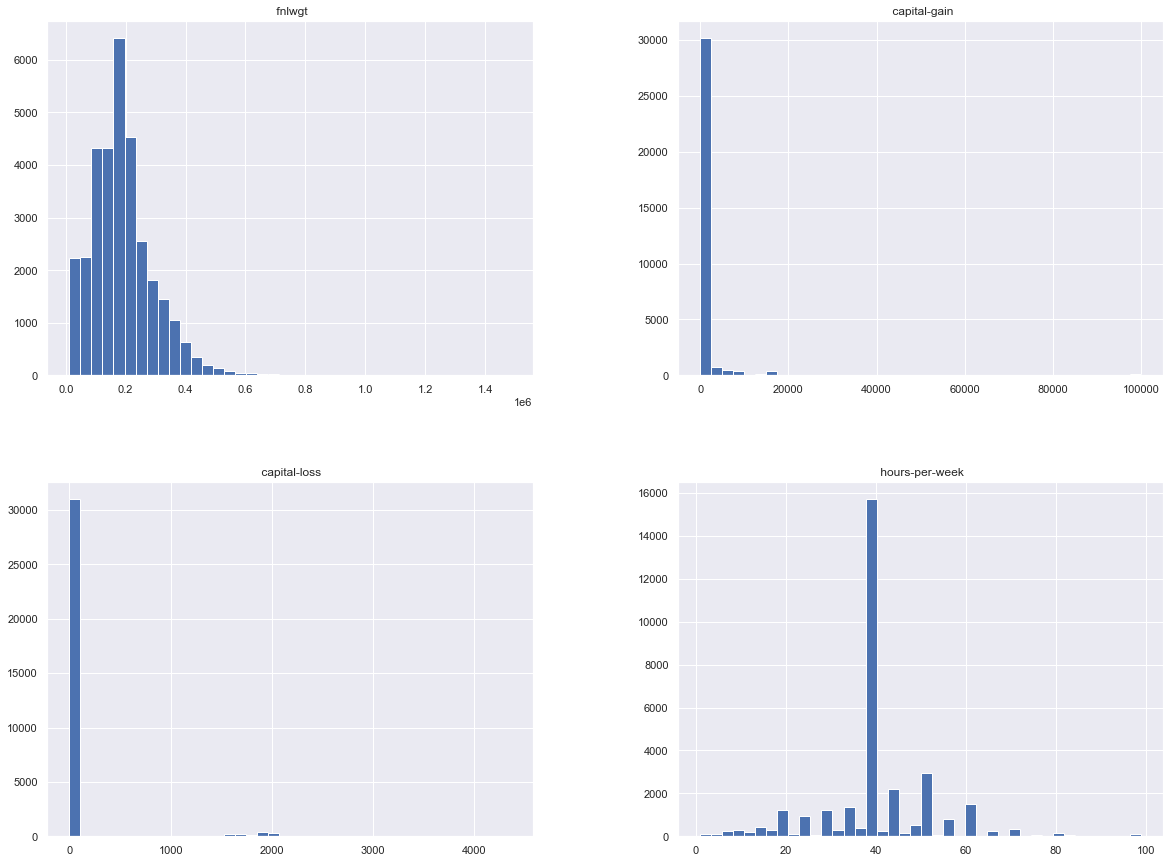

In [108]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

In [109]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [110]:
from sklearn.model_selection import train_test_split
X= df.drop([' income'], axis=1)
y= df[' income']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [112]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [113]:
X_train[cat_atr].head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country
16525,27,5,10,15,2,10,0,4,1,38
14551,5,4,9,12,4,4,1,4,0,38
518,4,0,15,9,4,0,4,4,0,38
22524,29,4,15,9,2,1,0,4,1,38
11425,0,4,2,7,4,6,3,4,1,38


In [114]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.18011138, -0.14783716, -0.21768425,  1.57918014],
       [ 0.20188912, -0.14783716, -0.21768425, -0.84195487],
       [ 0.1346865 , -0.14783716, -0.21768425, -0.43843237],
       ...,
       [-0.80501055, -0.14783716, -0.21768425, -0.03490987],
       [ 0.74194955, -0.14783716, -0.21768425, -0.03490987],
       [-1.2323759 , -0.14783716,  4.49422474,  0.36861264]])

In [115]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(22792, 14)

In [116]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [117]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[-1.56152668, -0.14169683, -0.21425901,  2.08669208],
       [ 0.17937669, -0.14169683, -0.21425901, -1.26166752],
       [-0.83549373,  3.52600278, -0.21425901,  0.78001516],
       ...,
       [-0.11086355,  0.51901102, -0.21425901, -0.03665791],
       [-0.62885321, -0.14169683, -0.21425901, -0.03665791],
       [ 1.71326482, -0.14169683, -0.21425901, -0.03665791]])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(9769, 14)

In [118]:
y_pred = knn.predict(Xtr1)

In [119]:
confusion_matrix(y_test, y_pred)

array([[6679,  871],
       [ 971, 1248]], dtype=int64)

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
accuracy_score(y_test, y_pred)

0.8114443648275156

In [122]:
from sklearn.metrics import precision_recall_fscore_support

In [123]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.8730719 , 0.58895706]),
 array([0.88463576, 0.5624155 ]),
 array([0.87881579, 0.57538036]),
 array([7550, 2219], dtype=int64))

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=22)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=24)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=26)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=28)

KNeighborsClassifier(n_neighbors=29)

KNeighborsClassifier(n_neighbors=30)

KNeighborsClassifier(n_neighbors=31)

KNeighborsClassifier(n_neighbors=32)

KNeighborsClassifier(n_neighbors=33)

KNeighborsClassifier(n_neighbors=34)

KNeighborsClassifier(n_neighbors=35)

KNeighborsClassifier(n_neighbors=36)

KNeighborsClassifier(n_neighbors=37)

KNeighborsClassifier(n_neighbors=38)

KNeighborsClassifier(n_neighbors=39)

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rate vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error Rate')

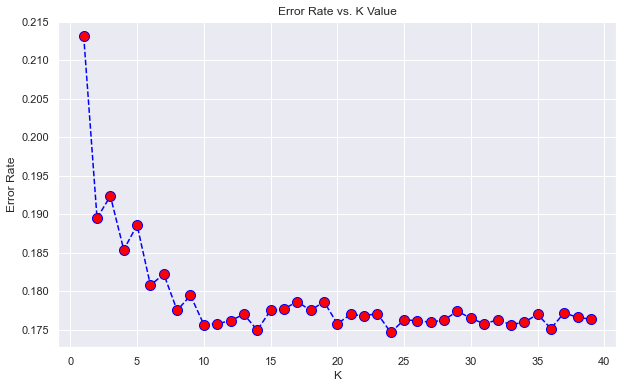

Minimum error:- 0.17463404647353875 at K = 24


In [124]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [125]:
knn = KNeighborsClassifier(n_neighbors=22, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=22)

In [126]:
y_pred = knn.predict(Xtr1)

In [127]:
accuracy_score(y_test, y_pred)

0.8232162964479476

# DECISION TREE CLASSIFIER

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


In [129]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [130]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [131]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [132]:
X= df.drop([' income'], axis=1)
y= df[' income']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [133]:
y.shape

(32561,)

In [134]:
X.shape

(32561, 14)

In [135]:
from sklearn.preprocessing import LabelEncoder

In [142]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [144]:
X_train[cat_atr].head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country
16525,27,5,10,15,2,10,0,4,1,38
14551,5,4,9,12,4,4,1,4,0,38
518,4,0,15,9,4,0,4,4,0,38
22524,29,4,15,9,2,1,0,4,1,38
11425,0,4,2,7,4,6,3,4,1,38


In [145]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.18011138, -0.14783716, -0.21768425,  1.57918014],
       [ 0.20188912, -0.14783716, -0.21768425, -0.84195487],
       [ 0.1346865 , -0.14783716, -0.21768425, -0.43843237],
       ...,
       [-0.80501055, -0.14783716, -0.21768425, -0.03490987],
       [ 0.74194955, -0.14783716, -0.21768425, -0.03490987],
       [-1.2323759 , -0.14783716,  4.49422474,  0.36861264]])

In [146]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(22792, 14)

In [148]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[-1.56152668, -0.14169683, -0.21425901,  2.08669208],
       [ 0.17937669, -0.14169683, -0.21425901, -1.26166752],
       [-0.83549373,  3.52600278, -0.21425901,  0.78001516],
       ...,
       [-0.11086355,  0.51901102, -0.21425901, -0.03665791],
       [-0.62885321, -0.14169683, -0.21425901, -0.03665791],
       [ 1.71326482, -0.14169683, -0.21425901, -0.03665791]])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(9769, 14)

In [149]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [150]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [151]:
y_pred = dt.predict(Xtr1)

In [152]:
np.sum((y_test == y_pred))/y_test.size

0.7960896714095609

In [153]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [154]:
df[' income'].unique()

array([' <=50K', ' >50K'], dtype=object)

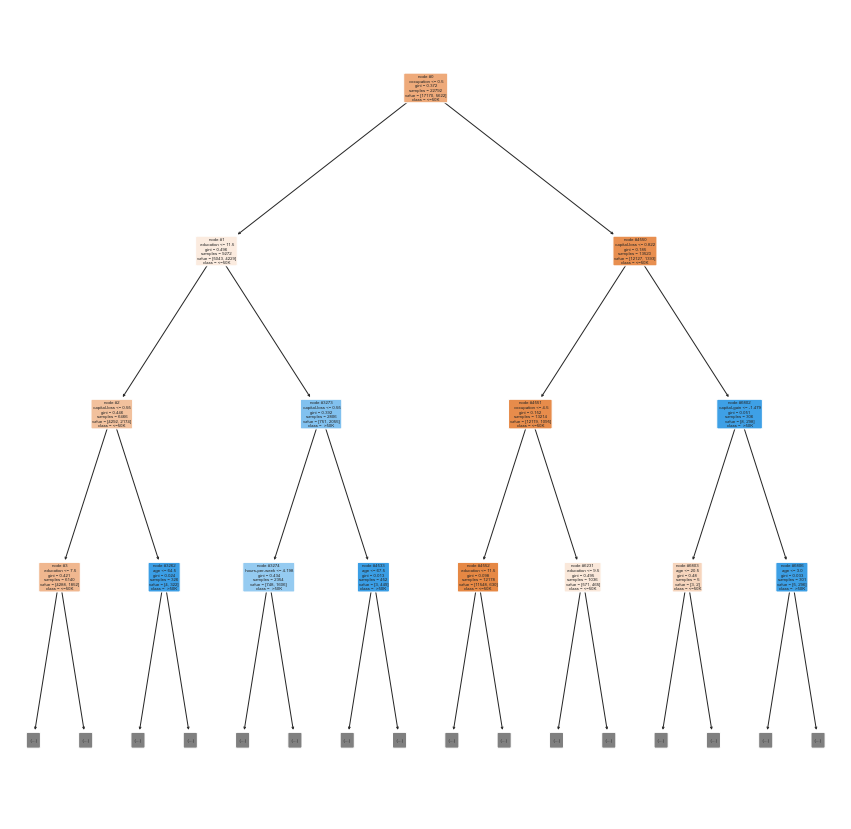

In [155]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'],
            class_names = ['<=50K',' >50K']
            )

_=plt.show()

# RANDOM FOREST CLASSIFIER

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot

In [157]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [158]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8579179035725253


In [159]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[7048,  502],
       [ 886, 1333]], dtype=int64)

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7550
        >50K       0.73      0.60      0.66      2219

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.86      0.85      9769



In [161]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [162]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [163]:
df.feature_names = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]
df.target_names = df[' income']

<ipython-input-163-44b548dc6b76>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',
<ipython-input-163-44b548dc6b76>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target_names = df[' income']


In [164]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

2     0.164399
0     0.142959
10    0.115659
7     0.114646
4     0.094271
12    0.084043
6     0.066566
5     0.063417
1     0.040643
11    0.036353
3     0.034071
13    0.017231
8     0.014356
9     0.011387
dtype: float64

In [165]:
list(zip(df.columns, feature_imp))

[('age', 0.16439850801006145),
 (' workclass', 0.14295887993889433),
 (' fnlwgt', 0.11565926708823808),
 (' education', 0.11464592906836663),
 (' education-num', 0.09427088262333756),
 (' marital-status', 0.08404278461671999),
 (' occupation', 0.06656625044001684),
 (' relationship', 0.06341688788915135),
 (' race', 0.04064287770166443),
 (' sex', 0.03635348910621184),
 (' capital-gain', 0.034070851684485336),
 (' capital-loss', 0.017230605985059533),
 (' hours-per-week', 0.014355606731150893),
 (' native-country', 0.011387179116641931)]

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


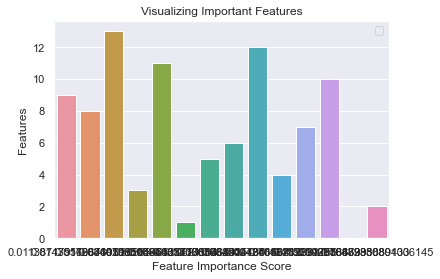

In [166]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [167]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.8558706111167981


In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7550
        >50K       0.73      0.59      0.65      2219

    accuracy                           0.86      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769

